# Predicting Direct Marketing Acceptance Rates in Retail Banking 


<center><b>Wayne H. Lee</b></center>
<center>Email: wayneone@gmail.com</center>



**OVERVIEW**

Real-world data from a Portuguese banking institution was used with machine learning techniques to predict the probability of a telephone marketing campaign recipient accepting the campaign, defined as signing up for the bank product and making a deposit.

Several machine learing classifiers are compared. They are K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  

The source of this dataset is the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

## Executive Summary

Various Machine learning techniques were used to determine which types of customer are most likely to accept a telephone marketing campaign and sign up for an account. 

Various computer models were evaluated based on their ability to accuractely predict a yes or no acceptance result. Data from 17 campaigns over the time period of May 2008 to November 2010 was used. A dataset of 38,488 was entries was used filtering out any records with incomplete data. 

An analysis of the models provided insight on specific customer attributes that contributed to predicting a positive response to the a marketing contact. 

**Top Customer Attributes Accepting a Marketing Contact**
* Job: Student
* Job: Retired	
* Job: Unemployed
* Age
* Education: University Degree
* Marital Status: Single


The complete list of customer attributes in priority order is available for download here: 
<a href="top_customer_acceptance_attributes_sorted.csv">top_customer_acceptance_attributes_sorted.csv</a>

**Action Items and Next Steps**
1. The financial instituation should review the sorted list of customer attributes that contributed to acceptance rates and create targed marketing campaigns that focues on these groups.
2. As the recommendations are only as good as the data used, the bank to continuously provide updated marketing campaign and acceptance data for re-evaluation. 
 

## Methodology: CRISP-DM Framework
For this application, an industry standard model called CRISP-DM is used.  This process provides a framework for working through a data problem.  



<center>
    <img src = images/crisp.png width = 50%/>
</center>

<center>
    <img src = images/CRISP-DM-Methodology.png width = 80%/>
</center>




## Business Understanding (Business Problem)

Since direct telephone marketing campaigns are costly and often yield low response rates, the Portuguese bank wants to focus its marketing efforts on more targeted strategies. By identifying groups of potential customers who are more likely to accept a campaign and sign up for an account, the bank can create directed campaigns that reduce time and cost while maintaining the same overall success rates.



### Deliverables
>After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

* Clear statement demonstrating your understanding of the business problem
* A correct and concise interpretation of descriptive and inferential statistics
* Findings (including actionable insights)
* Next steps and recommendations.




## Data Understanding & Data Preparation

The source dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

Incomplete records (any fields missing) were removed resulting in 30,488 records. 

In [114]:
from sklearn import linear_model
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.utils import shuffle
import graphviz 
import math as math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn.metrics as metrics
import time

In [115]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [116]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Describe and Explore Data


>Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

The data quality looks good. Some values are "Unknown" and the records removed. Types and values are consistent and clear. Only customer (Bank Client) data was considered in this evaluation. 


#### Input variables:



**Bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


In [117]:
df = df[~(df == "unknown").any(axis=1)]

In [118]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

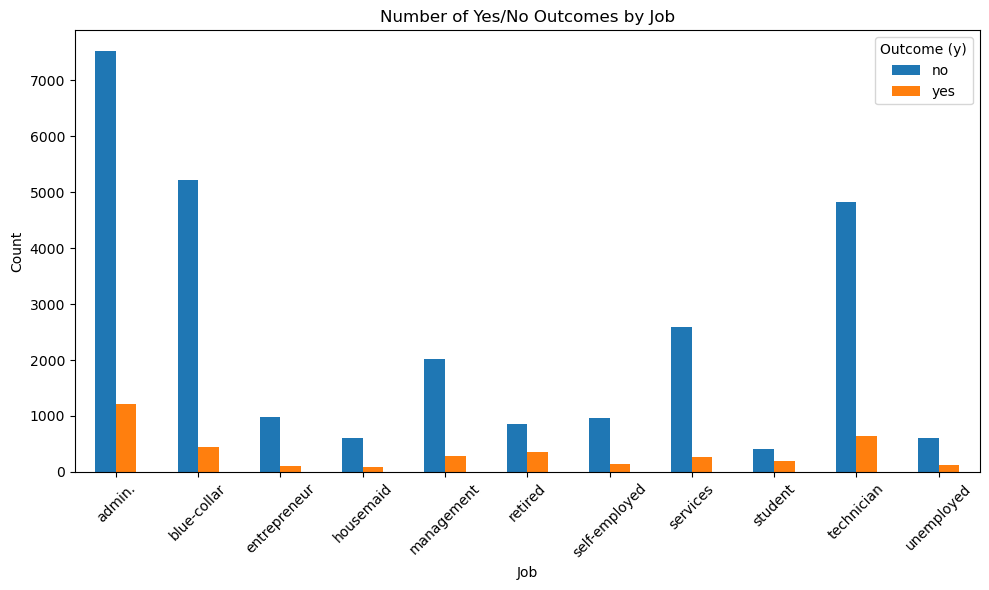

In [120]:
counts = df.groupby(["job", "y"]).size().unstack(fill_value=0)
counts.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Yes/No Outcomes by Job")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Outcome (y)")
plt.tight_layout()
plt.show()

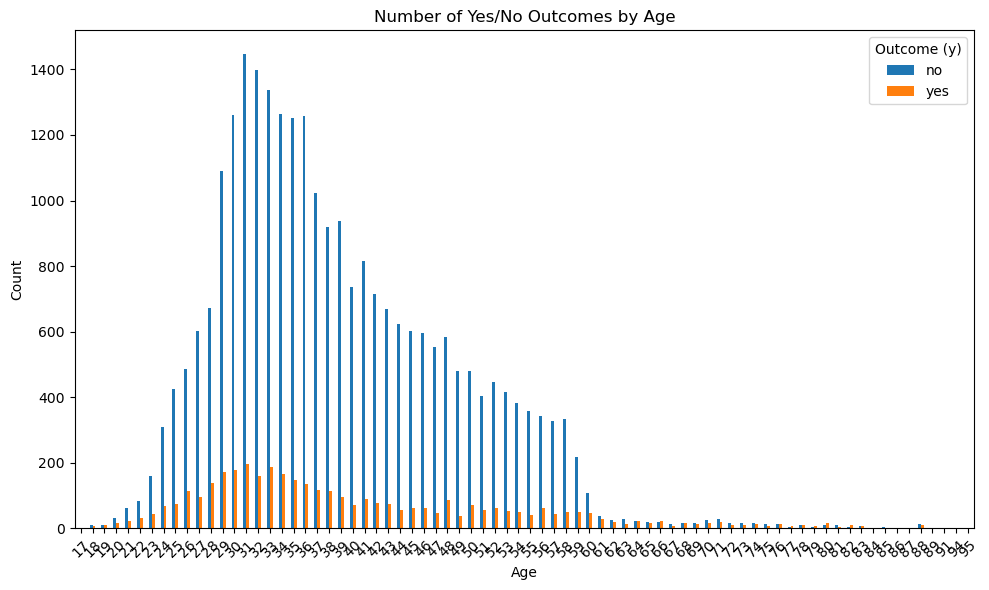

In [121]:
counts = df.groupby(["age", "y"]).size().unstack(fill_value=0)
counts.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Yes/No Outcomes by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Outcome (y)")
plt.tight_layout()
plt.show()

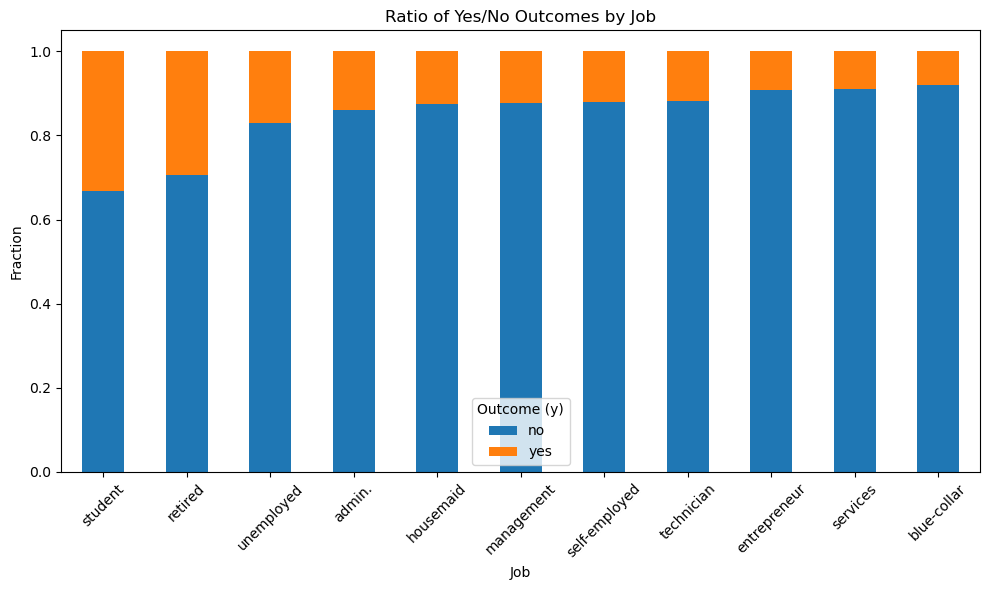

In [122]:

# Group by outcome (y), count rows
outcome_counts = df.groupby(["job", "y"]).size().unstack(fill_value=0)

# Calculate the fraction (ratio) of yes/no 
outcome_ratio = outcome_counts.div(outcome_counts.sum(axis=1), axis=0)

# Order by the fraction of "yes" outcomes in descending order
outcome_ratio = outcome_ratio.sort_values(by="yes", ascending=False)

# Plot stacked bar chart of these ratios
outcome_ratio.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Ratio of Yes/No Outcomes by Job")
plt.xlabel("Job")
plt.ylabel("Fraction")
plt.xticks(rotation=45)
plt.legend(title="Outcome (y)")
plt.tight_layout()
plt.show()

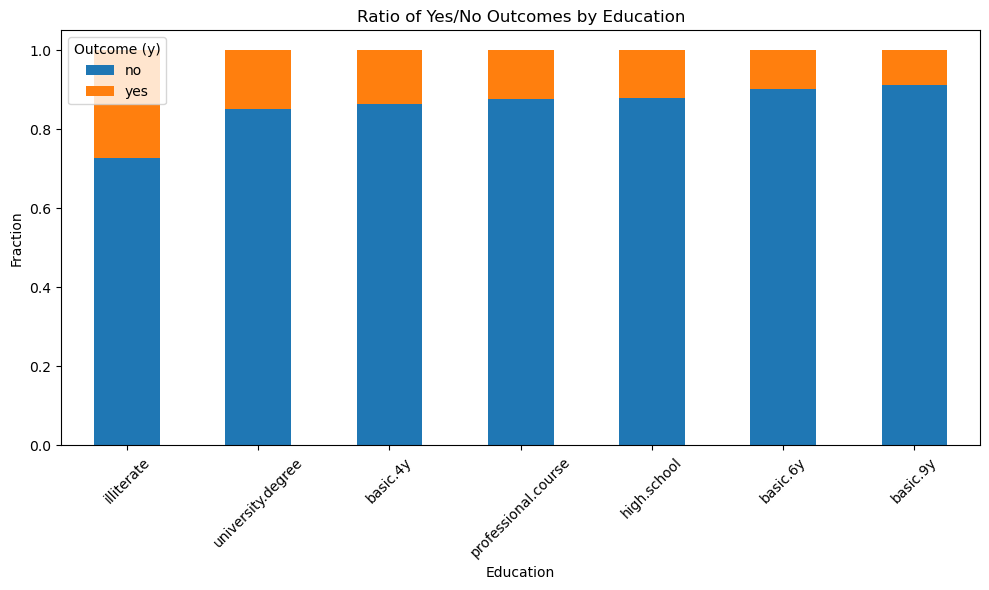

In [123]:

# Group by outcome (y), count rows
outcome_counts = df.groupby(["education", "y"]).size().unstack(fill_value=0)

# Calculate the fraction (ratio) of yes/no  
outcome_ratio = outcome_counts.div(outcome_counts.sum(axis=1), axis=0)

# Order by the fraction of "yes" outcomes in descending order
outcome_ratio = outcome_ratio.sort_values(by="yes", ascending=False)

# Plot stacked bar chart of these ratios
outcome_ratio.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Ratio of Yes/No Outcomes by Education")
plt.xlabel("Education")
plt.ylabel("Fraction")
plt.xticks(rotation=45)
plt.legend(title="Outcome (y)")
plt.tight_layout()
plt.show()

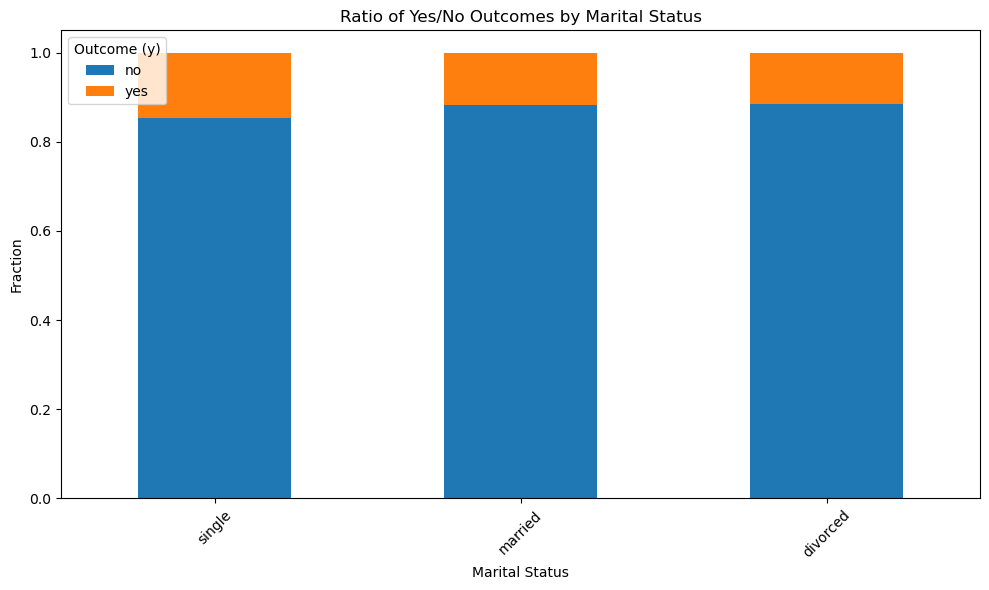

In [124]:

# Group by outcome (y), count rows
outcome_counts = df.groupby(["marital", "y"]).size().unstack(fill_value=0)

# Calculate the fraction (ratio) of yes/no  
outcome_ratio = outcome_counts.div(outcome_counts.sum(axis=1), axis=0)
# Order by the fraction of "yes" outcomes in descending order
outcome_ratio = outcome_ratio.sort_values(by="yes", ascending=False)
# Plot stacked bar chart of these ratios
outcome_ratio.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Ratio of Yes/No Outcomes by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Fraction")
plt.xticks(rotation=45)
plt.legend(title="Outcome (y)")
plt.tight_layout()
plt.show()

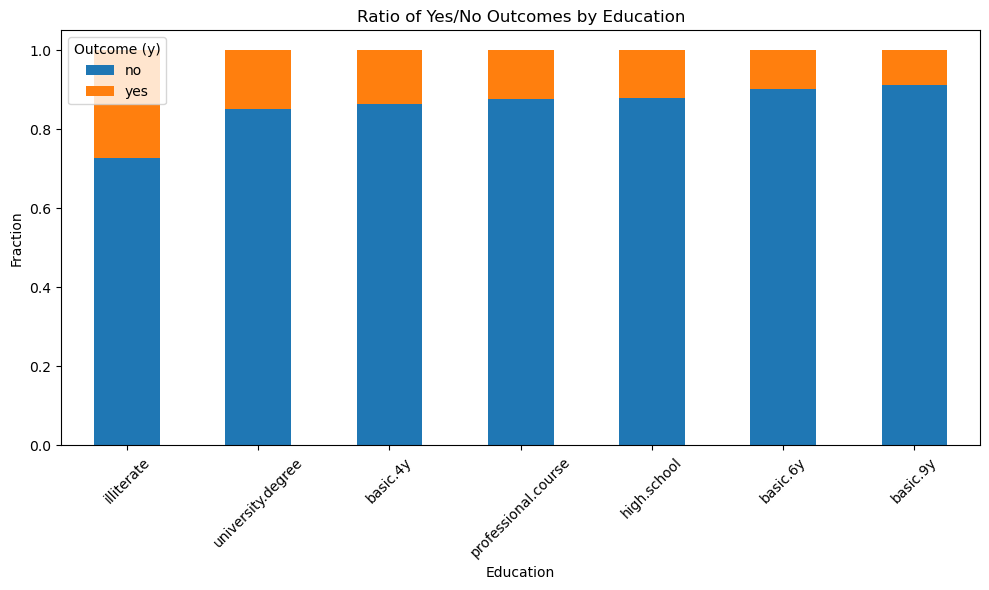

In [125]:
# Group by outcome (y), count rows
outcome_counts = df.groupby(["education", "y"]).size().unstack(fill_value=0)

# Calculate the fraction (ratio) of yes/no  
outcome_ratio = outcome_counts.div(outcome_counts.sum(axis=1), axis=0)
# Order by the fraction of "yes" outcomes in descending order
outcome_ratio = outcome_ratio.sort_values(by="yes", ascending=False)
# Plot stacked bar chart of these ratios
outcome_ratio.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Ratio of Yes/No Outcomes by Education")
plt.xlabel("Education")
plt.ylabel("Fraction")
plt.xticks(rotation=45)
plt.legend(title="Outcome (y)")
plt.tight_layout()
plt.show()

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

## Modeling

> Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

One Hot encoding will be used to prepare categorical features for modeling. 

In [127]:
#One Hot Linear Regression

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
numerical_features = ['age']
features = [numerical_features + categorical_features]

preprocessor = ColumnTransformer(
    transformers=[ 
        ('scal', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
    ], remainder='drop'
)

### Generate Test Design: Train/Test Split

> With your data prepared, split it into a train and test set.

The overall cleaned dataset will be split into a Training dataset used for training the models, and Dev Test dataset used to validate the model.  Twenty-five percent of the dataset will be used tor Dev Test, and the remaining 75% will be used for training. 

In [128]:
#Generate Test Design
# Split Test and Train
X = df.drop('y', axis=1)
y = df['y'] 
  

# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=33,  
                                   test_size=0.25,  
                                   shuffle=True)

In [129]:

# Examine Encoded Transformed Data Frame
transformed_array = preprocessor.fit_transform(X_train)
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(num_feature_names) + list(cat_feature_names)
transformed_df = pd.DataFrame(transformed_array.toarray(), columns = feature_names)

In [130]:
#Build Cross Validation Table to compare RMSE of different models
modeling_cross_validation = pd.DataFrame(columns=[
    "Model Name", 
    "Train Time (sec)", 
    "Train Predict Time (sec)",
    "Train Accuracy",
    "Test Accuracy"])

modeling_cross_validation

,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy


### KNN: Baseline Model 

> Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

KNN will be used as a baseline model. It achieved 0.878 Training accuracy and 0.866 Testing accuracy. 

In [131]:

knn_pipe = Pipeline([('transform', preprocessor), 
                     ('knn', KNeighborsClassifier())])

start = time.time()
knn_pipe.fit(X_train, y_train)
train_secs = time.time()-start 

start = time.time()
train_preds = knn_pipe.predict(X_train)
predict_secs = time.time()-start 

train_accuracy_score = accuracy_score(train_preds, y_train)

test_preds = knn_pipe.predict(X_test)
test_accuracy_score = accuracy_score (test_preds, y_test)

modeling_cross_validation.loc[len(modeling_cross_validation)] = [
    "K Nearest Neighbors", 
    train_secs, 
    predict_secs,
    train_accuracy_score,
    test_accuracy_score
   ]

modeling_cross_validation

,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.060496,12.047122,0.877722,0.865914


### Logistic Regression: A Simple Model

Logistic Regression is used to build a basic model of the data.  

In [132]:
lr_pipe = Pipeline([('transform', preprocessor), 
                     ('logr',LogisticRegression())])

start = time.time()
lr_pipe.fit(X_train, y_train)
train_secs = time.time()-start 

start = time.time()
train_preds = lr_pipe.predict(X_train)
predict_secs = time.time()-start 

train_accuracy_score = accuracy_score(train_preds, y_train)

test_preds = lr_pipe.predict(X_test)
test_accuracy_score = accuracy_score (test_preds, y_test)

modeling_cross_validation.loc[len(modeling_cross_validation)] = [
    "Logistic Regression", 
    train_secs, 
    predict_secs,
    train_accuracy_score,
    test_accuracy_score
   ]

modeling_cross_validation


,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.060496,12.047122,0.877722,0.865914
1,Logistic Regression,0.062348,0.015992,0.873174,0.874180


In [133]:
# Examine Encoded Transformed Data Frame
transformed_array = preprocessor.fit_transform(X_train)
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(num_feature_names) + list(cat_feature_names)
transformed_df = pd.DataFrame(transformed_array.toarray(), columns = feature_names)
transformed_df

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,-0.874680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.200957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.050243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.393449,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.393449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22861,3.167659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
22862,0.857751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
22863,-0.682188,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
22864,-0.200957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


**Examine Logistic Regression Coefficients**

Logistic Regression Coefficients can be examined to understand the relative weights of the features and their values. For example, this shows that the potential customers who were students, retired, and unemployed contributed highly to a yes result. 

In [134]:
#Examine Coefficients
coefs = lr_pipe.named_steps['logr'].coef_


df_coefs = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs[0]})
df_coefs_sorted = df_coefs.sort_values(by='Coefficient', ascending=False)
df_coefs_sorted.to_csv ("top_customer_acceptance_attributes_sorted.csv")
df_coefs_sorted.head(30)

,Feature,Coefficient
9,job_student,1.093500
6,job_retired,0.660734
11,job_unemployed,0.278406
0,age,0.125649
21,education_university.degree,0.085548
14,marital_single,0.045676
19,education_illiterate,-0.006189
23,default_yes,-0.018207
20,education_professional.course,-0.031262
16,education_basic.6y,-0.075434


### Decision Tree Model
Using default values, a tree of depth of 30 was produced.

In [135]:
dt_pipe = Pipeline([('transform', preprocessor), 
                     ('dtc',DecisionTreeClassifier())])

start = time.time()
dt_pipe.fit(X_train, y_train)
train_secs = time.time()-start 

start = time.time()
train_preds = dt_pipe.predict(X_train)
predict_secs = time.time()-start 

train_accuracy_score = accuracy_score(train_preds, y_train)

test_preds = dt_pipe.predict(X_test)
test_accuracy_score = accuracy_score (test_preds, y_test)

modeling_cross_validation.loc[len(modeling_cross_validation)] = [
    "Decision Tree", 
    train_secs, 
    predict_secs,
    train_accuracy_score,
    test_accuracy_score
   ]

modeling_cross_validation

,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.060496,12.047122,0.877722,0.865914
1,Logistic Regression,0.062348,0.015992,0.873174,0.874180
2,Decision Tree,0.146735,0.018968,0.901426,0.853713


In [136]:
dt_pipe['dtc'].tree_.max_depth

30

**ROC (Receiver Operating Characteristic) Curve - Decision Tree Model**

Plot the ROC Curve to understand the quality of the model. 

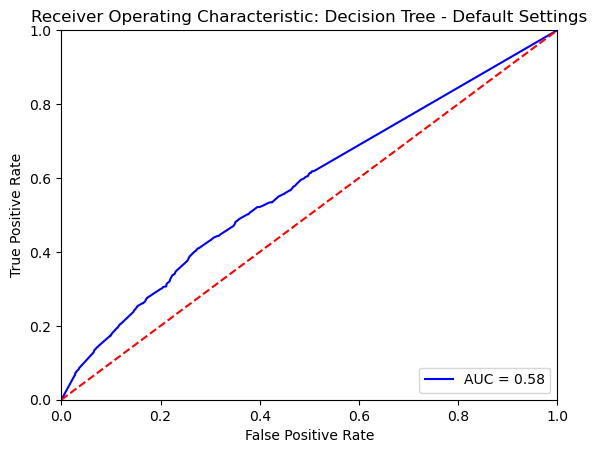

In [137]:
#Plot ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
probs = dt_pipe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label='yes')
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic: Decision Tree - Default Settings')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM (Support Vector Machine) Model 

In [138]:
svm_pipe = Pipeline([('transform', preprocessor), 
                     ('svc',SVC())])

start = time.time()
svm_pipe.fit(X_train, y_train)
train_secs = time.time()-start 

start = time.time()
train_preds = svm_pipe.predict(X_train)
predict_secs = time.time()-start 

train_accuracy_score = accuracy_score(train_preds, y_train)

test_preds = svm_pipe.predict(X_test)
test_accuracy_score = accuracy_score (test_preds, y_test)

modeling_cross_validation.loc[len(modeling_cross_validation)] = [
    "SVM Tree", 
    train_secs, 
    predict_secs,
    train_accuracy_score,
    test_accuracy_score
   ]

modeling_cross_validation

,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.060496,12.047122,0.877722,0.865914
1,Logistic Regression,0.062348,0.015992,0.873174,0.874180
2,Decision Tree,0.146735,0.018968,0.901426,0.853713
3,SVM Tree,12.909237,4.561539,0.873524,0.873918


### Assess Models: Default Settings & Evaluation Metric

Default settings are used to compare the performance of the Logistic Regression, KNN algorithm, Decision Tree, and SVM models.  Fit time, training and test accuracy of each model is compared. The Accuracy Evaluation Metric is used to understand number of correct predictions over the number of total predictions.

In [139]:
modeling_cross_validation

,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.060496,12.047122,0.877722,0.865914
1,Logistic Regression,0.062348,0.015992,0.873174,0.874180
2,Decision Tree,0.146735,0.018968,0.901426,0.853713
3,SVM Tree,12.909237,4.561539,0.873524,0.873918


### Assess Models: KNN - Revise Parameter Settings 

Optimize hyperparameter 'k' for nearest neighbor. Values from 1 to 100 are tried. The incremental improvements in the Accuracy metric are small after k=10, however the model settled on a value of k=85 as optimal. There is a small increase in predict time with the larger k. 

In [ ]:

parameters_values = np.array(range(1,100))

parameters = {'knn__n_neighbors': parameters_values }

knn_pipe_search = GridSearchCV(estimator = knn_pipe, 
                               param_grid = parameters, 
                               scoring = "accuracy",
                               cv = 5)

knn_pipe_search.fit(X_train, y_train)
knn_pipe_search.best_estimator_


In [ ]:
gridsearch_output = pd.DataFrame({'CV accuracy': knn_pipe_search.cv_results_['mean_test_score'],
             'k': parameters_values})
fig = px.line(gridsearch_output, x = "k", y = "CV accuracy", title="KNN Tree Hyperparameter Tuning: CV Accuracy vs k-nearest neighbors")
fig.show()

In [ ]:

start = time.time()
knn_pipe_search.best_estimator_.fit(X_train, y_train)
train_secs = time.time()-start 

start = time.time()
train_preds = knn_pipe_search.best_estimator_.predict(X_train)
predict_secs = time.time()-start 

train_accuracy_score = accuracy_score(train_preds, y_train)

test_preds = knn_pipe_search.best_estimator_.predict(X_test)
test_accuracy_score = accuracy_score (test_preds, y_test)

modeling_cross_validation.loc[len(modeling_cross_validation)] = [
    "K Nearest Neighbors Tuning - k: " + str(knn_pipe_search.best_params_['knn__n_neighbors']) , 
    train_secs, 
    predict_secs,
    train_accuracy_score,
    test_accuracy_score
   ]

modeling_cross_validation


,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.042904,14.639870,0.877722,0.865914
1,Logistic Regression,0.075752,0.018559,0.873174,0.874180
2,Decision Tree,0.166403,0.021647,0.901426,0.853451
3,SVM Tree,13.091057,4.580173,0.873524,0.873918
4,K Nearest Neighbors Tuning - k: 85,0.042647,12.401244,0.873305,0.873393


### Assess Models: Decision Tree - Revise Parameter Settings 

Optimize hyperparameter 'max_depth' for Decision Tree. Values from 1 to 33 are tried. Compared to the default settings which produced a tree of depth of 30, GridSearchCV identified a flat tree of max_depth=1 as optimal which produced a slightly higher test accuracy. 

In [ ]:
parameters_values = np.array(range(1,33))
parameters = {'dtc__max_depth': parameters_values}


dtc_pipe_search = GridSearchCV(estimator = dt_pipe, 
                               param_grid = parameters, 
                               scoring = "accuracy")

dtc_pipe_search.fit(X_train, y_train)
dtc_pipe_search.best_estimator_


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('scal', StandardScaler(),
                                                  ['age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('dtc', DecisionTreeClassifier(max_depth=1))])

In [ ]:
dtc_pipe_search.best_estimator_['dtc'].tree_.max_depth

1

In [ ]:


start = time.time()
dtc_pipe_search.best_estimator_.fit(X_train, y_train)
train_secs = time.time()-start 

start = time.time()
train_preds = dtc_pipe_search.best_estimator_.predict(X_train)
predict_secs = time.time()-start 

train_accuracy_score = accuracy_score(train_preds, y_train)

test_preds = dtc_pipe_search.best_estimator_.predict(X_test)
test_accuracy_score = accuracy_score (test_preds, y_test)

modeling_cross_validation.loc[len(modeling_cross_validation)] = [
    "Decision Tree Tuning - Max Depth: " + str(dtc_pipe_search.best_estimator_['dtc'].tree_.max_depth ), 
    train_secs, 
    predict_secs,
    train_accuracy_score,
    test_accuracy_score
   ]

modeling_cross_validation



,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.042904,14.639870,0.877722,0.865914
1,Logistic Regression,0.075752,0.018559,0.873174,0.874180
2,Decision Tree,0.166403,0.021647,0.901426,0.853451
3,SVM Tree,13.091057,4.580173,0.873524,0.873918
4,K Nearest Neighbors Tuning - k: 85,0.042647,12.401244,0.873305,0.873393
5,Decision Tree Tuning - Max Depth: 1,0.052454,0.018275,0.873174,0.874180


In [ ]:
gridsearch_output = pd.DataFrame({'CV accuracy': dtc_pipe_search.cv_results_['mean_test_score'],
             'Max Depth': parameters_values})
fig = px.line(gridsearch_output, x = "Max Depth", y = "CV accuracy",title="Decision Tree Hyperparameter Tuning: CV Accuracy vs Max Depth")
fig.show()

## Evaluation

The following models were considered with default values:

* K Nearest Neighbors (KNN)
* Logistic Regression
* Decision Tree
* SVM (Support Vector Machine)

Further performance hyper-parameter tuning using GridSearchCV was performed on the following models:
* K Nearest Neighbors - Tuning K
* Decision Tree - Tuning the Max Depth

In evaluating the model cross validation, the following observations can be made:
* Most models were quick to train with the exception of SVM, which was 13 seconds compared to sub-second trainin times of the other models. 
* The trade off with SVM was that it yielded one of the highest test accuracies with medium predict time. 
* K-Nearest Neighbors was the slowest to predict at 12-14 secondes depending on 'k'. However it also yielded a top test accuracy score. 
* Logistic regression also produced a good accuracy score with fast training and the fastest predict times. 
* Increasing K for K-Nearest neighbor increased Test accuracy above the default k=5. GridSearch CV found that 85 was the optimal, but with little incremental gains with k>10. 
* The hyperparementer tuning of the Decision Tree yieleded the most interesting result with an optimal Max Depth of 1. This suggests at the default depth of 30 that the model produced, it may be overfitting as it yielded a better training accuracy, but worse test accuracy. 




In [ ]:
#Display Model Comparison
modeling_cross_validation

,Model Name,Train Time (sec),Train Predict Time (sec),Train Accuracy,Test Accuracy
0,K Nearest Neighbors,0.042904,14.639870,0.877722,0.865914
1,Logistic Regression,0.075752,0.018559,0.873174,0.874180
2,Decision Tree,0.166403,0.021647,0.901426,0.853451
3,SVM Tree,13.091057,4.580173,0.873524,0.873918
4,K Nearest Neighbors Tuning - k: 85,0.042647,12.401244,0.873305,0.873393
5,Decision Tree Tuning - Max Depth: 1,0.052454,0.018275,0.873174,0.874180


By examining the coefficients produced by this model, we can identify which factors (a data feature and corresponding value) contribute the most to a positive outcome from the marketing contact. Because of the binary nature of One Hot Encoding and that it gives equal weight to all of the categorical feature values, we can sort the coefficients table to identify which customer classes yield the best result.

In this evaluation, these are the customer attributes with the highest accepance rates. 
* Job: Student
* Job: Retired	
* Job: Unemployed
* Age
* Education: University Degree
* Marital Status: Single


The complete list of customer attributes in priority order is available for download here: 
<a href="top_customer_acceptance_attributes_sorted.csv">top_customer_acceptance_attributes_sorted.csv</a>

In [ ]:
df_coefs_sorted.head(15)

,Feature,Coefficient
9,job_student,1.093500
6,job_retired,0.660734
11,job_unemployed,0.278406
0,age,0.125649
21,education_university.degree,0.085548
14,marital_single,0.045676
19,education_illiterate,-0.006189
23,default_yes,-0.018207
20,education_professional.course,-0.031262
16,education_basic.6y,-0.075434
